In [1]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from scipy.cluster import hierarchy

## Lab1

we perform PCA on the USArrests data set, which is part of the base R package. The rows of the data set contain the 50 states, in alphabetical order.

In [2]:
df = pd.read_csv(filepath_or_buffer='/Users/sudiptarakshit/Desktop/Python/ISLR Python/Datasets/USArrests.csv',index_col=0)

`index_col=None`

index_col : int, str, sequence of int / str, or False, optional, default ``None``
  Column(s) to use as the row labels of the ``DataFrame``, either given as
  string name or column index. If a sequence of int / str is given, a
  MultiIndex is used.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


The columns of the data set contain the four variables.

In [4]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [5]:
df.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [6]:
df.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

In [7]:
df.describe().iloc[1:] # Remove the count row in the dataframe

,Murder,Assault,UrbanPop,Rape
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


We first briefly examine the data. 
- We notice that the variables have vastly different means
- We see that there are on average three times as many rapes as murders, and more than eight times as many assaults as rapes.
- Not surprisingly, the variables also have vastly different variances: 

`The UrbanPop variable measures the percentage of the population in each state living in an urban area, which is not a comparable number to the number of rapes in each state per 100,000 individuals. If we failed to scale the variables before performing PCA, then most of the principal components that we observed would be driven by the Assault variable, since it has by far the largest mean and variance. Thus, it is important to standardize the variables to have mean zero and standard deviation one before performing PCA.`

**We can transpose the describe() matrix**

In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


In [8]:
#Scaling of the dataframe
scale(X=df, axis=0)

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

`scale`

Standardize a dataset along any axis.

Center to the mean and component wise scale to unit variance.


In [9]:
X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)

`pd.DataFrame`

Two-dimensional, size-mutable, potentially heterogeneous tabular data.

Data structure also contains labeled axes (rows and columns).

In [10]:
X.head()

,Murder,Assault,UrbanPop,Rape
Alabama,1.255179,0.790787,-0.526195,-0.003451
Alaska,0.513019,1.118060,-1.224067,2.509424
Arizona,0.072361,1.493817,1.009122,1.053466
Arkansas,0.234708,0.233212,-1.084492,-0.186794
California,0.281093,1.275635,1.776781,2.088814


`PCA`

n_components int, float or ‘mle’, default=None
Number of components to keep. if n_components is not pre defined, all components are kept.

n_components == min(n_samples, n_features)

In [11]:
# The loading vectors
pca_loadings = PCA(n_components=4).fit(X).components_

pca_loadings = pd.DataFrame(pca_loadings, index=df.columns, columns=['PC1', 'PC2', 'PC3', 'PC4'])
pca_loadings

,PC1,PC2,PC3,PC4
Murder,0.535899,0.583184,0.278191,0.543432
Assault,0.418181,0.187986,-0.872806,-0.167319
UrbanPop,-0.341233,-0.268148,-0.378016,0.817778
Rape,0.649228,-0.743407,0.133878,0.089024


In [12]:
# Fit the PCA model and transform X to get the principal components
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4'], index=X.index)
df_plot.head()

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


Text(0, 0.5, 'Second Principal Component')

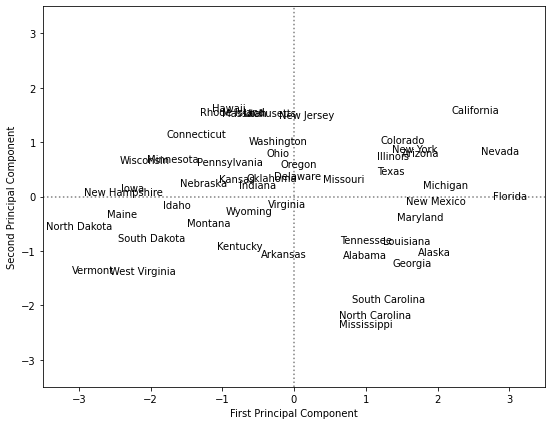

In [22]:
fig, ax1 = plt.subplots(figsize=(9,7))
ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# Plot Principal Components 1 and 2
for i in df_plot.index:
    ax1.annotate(i, (df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')

# Plot reference lines
#Plot vertical lines at each *x* from *ymin* to *ymax*
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')

`fig, ax = plt.subplots()`
Create just a figure and only one subplot

`ax1.annotate(text, xy, *args, **kwargs)`

Annotate the point *xy* with text *text*.

In the simplest form, the text is placed at *xy*.

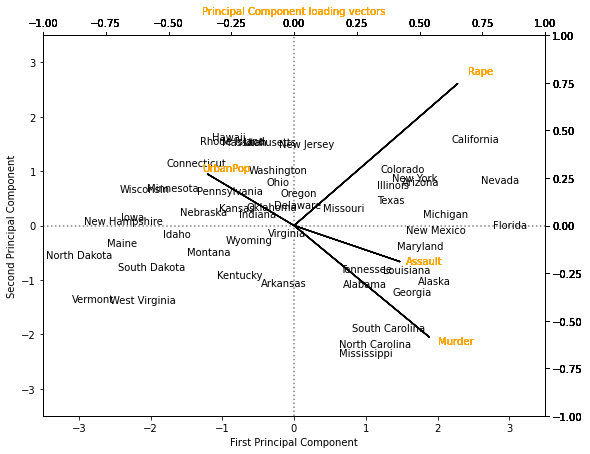

In [30]:
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx()
ax2 = ax2.twiny()

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Principal Component loading vectors', color='orange')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07  
for i in pca_loadings[['PC1', 'PC2']].index:
    ax2.annotate(i, (pca_loadings.PC1.loc[i]*a, -pca_loadings.PC2.loc[i]*a), color='orange')

# Plot vectors
ax2.arrow(0,0,pca_loadings.PC1[0], -pca_loadings.PC2[0])
ax2.arrow(0,0,pca_loadings.PC1[1], -pca_loadings.PC2[1])
ax2.arrow(0,0,pca_loadings.PC1[2], -pca_loadings.PC2[2])
ax2.arrow(0,0,pca_loadings.PC1[3], -pca_loadings.PC2[3])
'''
Add an arrow to the Axes.

This draws an arrow from ``(x, y)`` to ``(x+dx, y+dy)``.

Parameters
----------
x, y : float
    The x and y coordinates of the arrow base.

dx, dy : float
    The length of the arrow along x and y direction.
'''
fig

The standard deviation of each principal component. For instance, on the USArrests data set, we can access these standard deviations

In [31]:
# Standard deviation of the four principal components
np.sqrt(pca.explained_variance_)

array([1.5908673 , 1.00496987, 0.6031915 , 0.4206774 ])

The variance explained by each principal component is obtained by squaring these:

In [32]:
pca.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

To compute the proportion of variance explained by each principal compo- nent, we simply divide the variance explained by each principal component by the total variance explained by all four principal components.

In [33]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

We see that the first principal component explains 62.0% of the variance in the data, the next principal component explains 24.7 % of the variance, and so forth. We can plot the PVE explained by each component, as well as the cumulative PVE

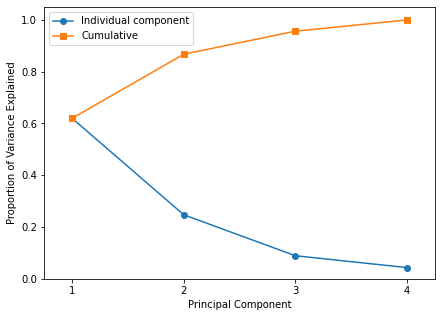

In [35]:
plt.figure(figsize=(7,5))

plt.plot([1,2,3,4], pca.explained_variance_ratio_, '-o', label='Individual component')
plt.plot([1,2,3,4], np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])
plt.legend(loc=2);